In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

from IPython.html import widgets

%matplotlib inline

## Image Processing in OpenCV
- [resource](http://docs.opencv.org/trunk/doc/py_tutorials/py_imgproc/py_table_of_contents_imgproc/py_table_of_contents_imgproc.html#py-table-of-content-imgproc)

### topics covered
- Image Gradients
- Canny Edge Detection

### Image Gradients 

they are high-pass filters that can be used to find edges, as discussed in [opencv tutorial 2.1](opencv%20python%20tutorials%202.1%20-%20image%20processing.ipynb). 

- Four main low-pass filters: blur, medianBlur, GaussianBlur, bilateralFilter
- Three main high-pass filters: Sobel, Scharr, Laplacian
- At the end of the day, people will mostly use Canny filter for edge detection

(<matplotlib.text.Text at 0x7f438b75c150>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

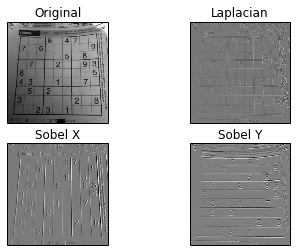

In [2]:
img = cv2.imread('public-images/sudoku.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

### Canny Edge Detection

OpenCV puts all the above in single function, cv2.Canny(). We will see how to use it. First argument is our input image. Second and third arguments are our minVal and maxVal respectively. Third argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3. Last argument is L2gradient which specifies the equation for finding gradient magnitude. If it is True, it uses the equation mentioned above which is more accurate, otherwise it uses this function: Edge_Gradient (G) = |G_x| + |G_y|. By default, it is False.

on parameters `minVal` and `maxVal`: Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to “sure-edge” pixels, they are considered to be part of edges. Otherwise, they are also discarded. 

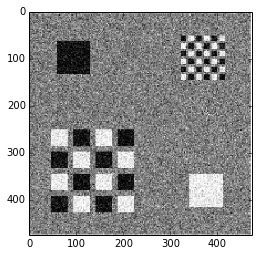

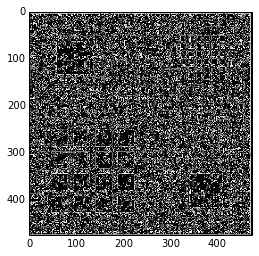

In [3]:
noise_edge = io.imread("public-images/edge_noise.gif")
noise_edge = cv2.cvtColor(noise_edge, cv2.COLOR_RGB2GRAY)
plt.imshow(noise_edge, cmap = plt.cm.gray)

edges = cv2.Canny(noise_edge, 100, 200)
plt.figure()
plt.imshow(edges, cmap = plt.cm.gray)

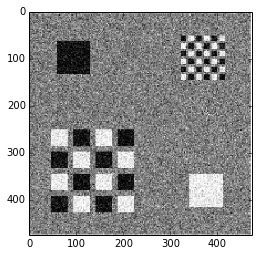

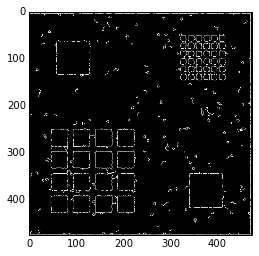

In [4]:
noise_edge = io.imread("public-images/edge_noise.gif")
noise_edge = cv2.cvtColor(noise_edge, cv2.COLOR_RGB2GRAY)
plt.imshow(noise_edge, cmap = plt.cm.gray)

denoised_edge = cv2.bilateralFilter(noise_edge, 6, 100, 100)

edges = cv2.Canny(denoised_edge, 100, 200)
plt.figure()
plt.imshow(edges, cmap = plt.cm.gray)